# EDA on Titanic Data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('./data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [28]:
df.shape

(891, 12)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
# Types of Columns

# Numerical         Categorical         Target
# -----------------------------------------------
# Age               Embarked            Survived
# Fare              Sex
# Survived          Cabin
# Pclass            Ticket
# SibSp 
# Parch

## Multivariate Analysis

### Correlation Matrix (Numerical Overview)

In [31]:
# Correlation Matrix

# Selecting numeric columns only
num_cols = ['Age', 'Fare', 'Survived', 'Pclass', 'SibSp', 'Parch']

corr = df[num_cols].corr()
corr

,Age,Fare,Survived,Pclass,SibSp,Parch
Age,1.000000,0.096067,-0.077221,-0.369226,-0.308247,-0.189119
Fare,0.096067,1.000000,0.257307,-0.549500,0.159651,0.216225
Survived,-0.077221,0.257307,1.000000,-0.338481,-0.035322,0.081629
Pclass,-0.369226,-0.549500,-0.338481,1.000000,0.083081,0.018443
SibSp,-0.308247,0.159651,-0.035322,0.083081,1.000000,0.414838
Parch,-0.189119,0.216225,0.081629,0.018443,0.414838,1.000000


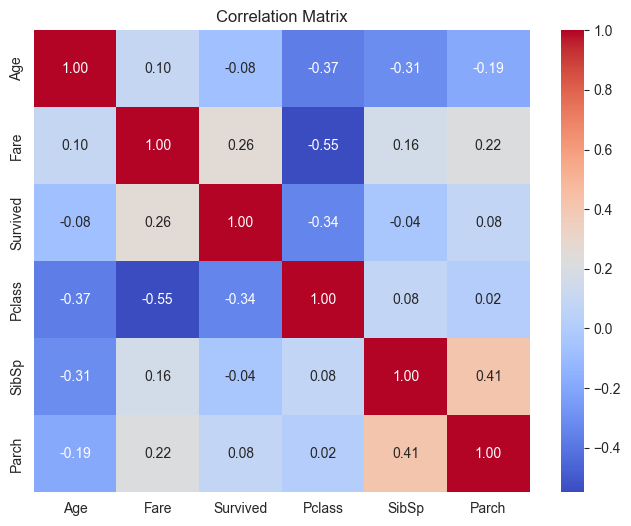

In [32]:
plt.figure(figsize=(8,6))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Correlation gives directional insight but must be interpreted carefully because some numerical variables are categorical in nature.

### Pair Plot (Visual Multivariate View)

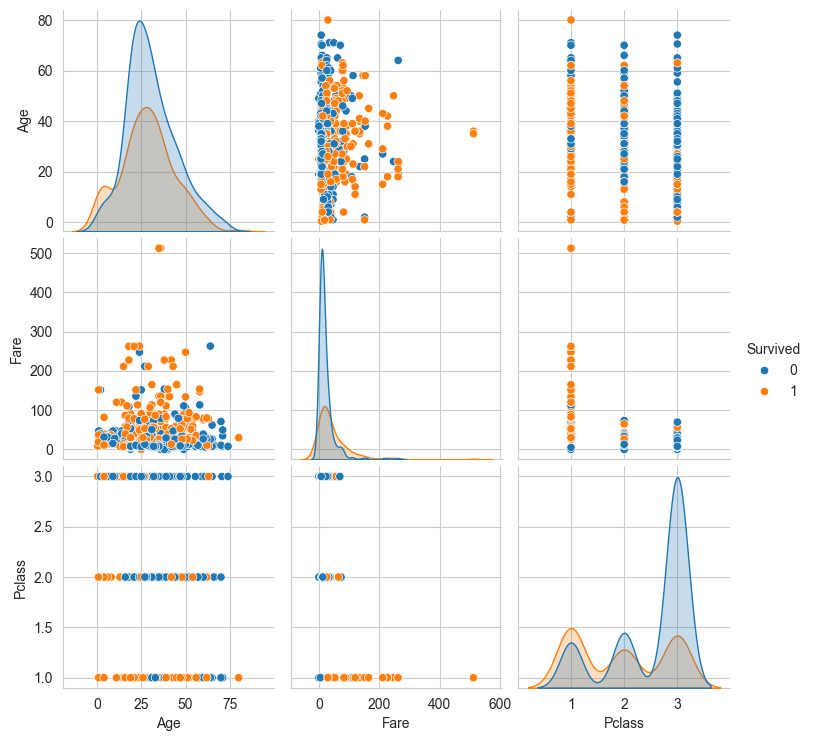

In [33]:
# Pair Plot

# Selecting Important columns
pair_cols = ['Age', 'Fare', 'Pclass', 'Survived']

sns.pairplot(df[pair_cols], hue='Survived', diag_kind='kde')
plt.show()

### Identifying Key Influencing Features

In [38]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [39]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [40]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [41]:
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [42]:
# Feature influence ranking (conceptual)


# Strong influence        Moderate influence        Weak influence
# ----------------------------------------------------------------------
#   - Sex                   - Age                    -  SibSp
#   - Pclass                - Embarked               -  Parch (alone)
#   - Fare